# Importing libraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
#importing dataset
iris = pd.read_csv('iris.csv')

In [173]:
#dataset sample
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [174]:
#checking for missing values
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


analysing data

In [175]:
iris['Species'].value_counts()


Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [176]:
#remove unwanted data
#dataset = dataset.drop("Id",axis=1 )
dataset.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


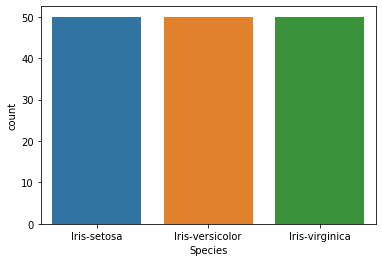

In [177]:
#three types of species 
sns.countplot('Species',data=X)
plt.show()


# data analysis via data visualization

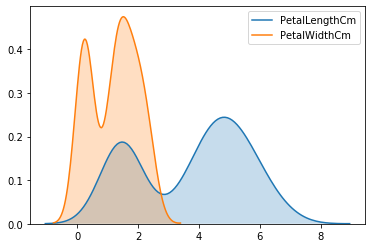

In [178]:
#variation of petallength petal width of flowers.
sns.kdeplot(data=dataset['PetalLengthCm'], shade=True)
sns.kdeplot(data=dataset['PetalWidthCm'], shade=True)

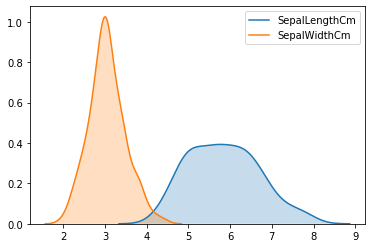

In [179]:
#variation of petallength sepal width of flowers.
sns.kdeplot(data=dataset['SepalLengthCm'], shade=True)
sns.kdeplot(data=dataset['SepalWidthCm'], shade=True)

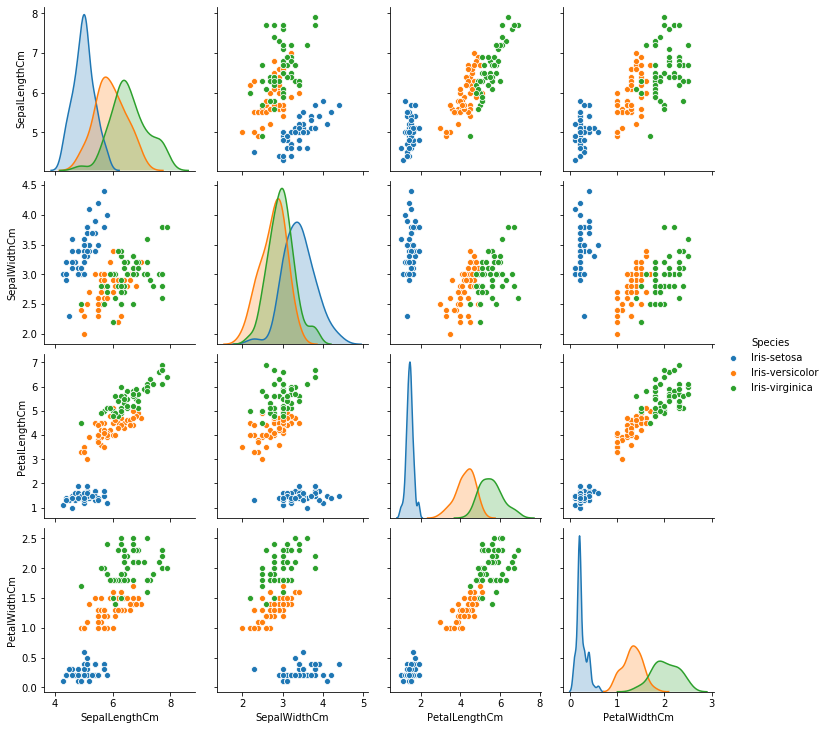

In [180]:
#complete visualization of data seprated by species 
sns.pairplot(dataset,hue='Species');

# Data pre-processing


In [218]:
data = X.drop("Species",axis = 1)
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [219]:
print('shape of data(rows & columns) = {}'.format(data.shape))

shape of data(rows & columns) = (150, 4)


# feature scaling

In [182]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled = sc.fit_transform(data)
print('shape of numpy array = {}'.format(data_scaled.shape))

shape of numpy array = (150, 4)


# K-Means clustering

finding optimal no of clusters by elbow method

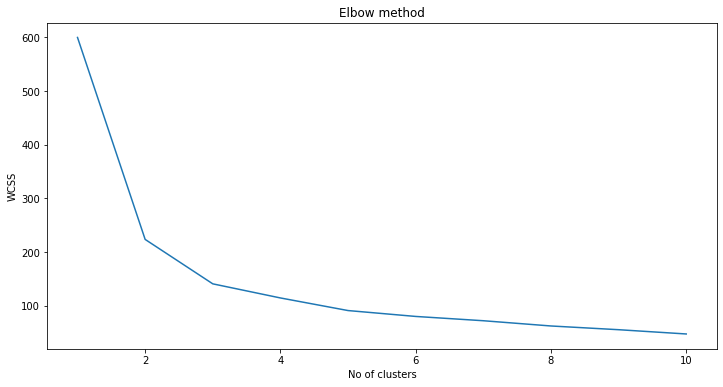

In [183]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++",random_state = 42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

 By elbow method we had predicted no of clusters for iris dataset is "3"

# cross checking for no of clusters

In [208]:
#hack if you confused to select no of clusters from elbow method do this:

for info visit: https://kneed.readthedocs.io/en/latest/parameters.html

In [213]:
from kneed import KneeLocator
e = KneeLocator(range(1,11),wcss,curve='convex',direction="decreasing")
print('from elbow method optimal number of clusters = {}'.format(e.elbow))

from elbow method optimal number of clusters = 3


In [200]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_scaled)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

 For more information about elbow methow visit :
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#:~:text=The%20elbow%20method%20runs%20k,point%20to%20its%20assigned%20center.

# Visualization with optimal no of clusters

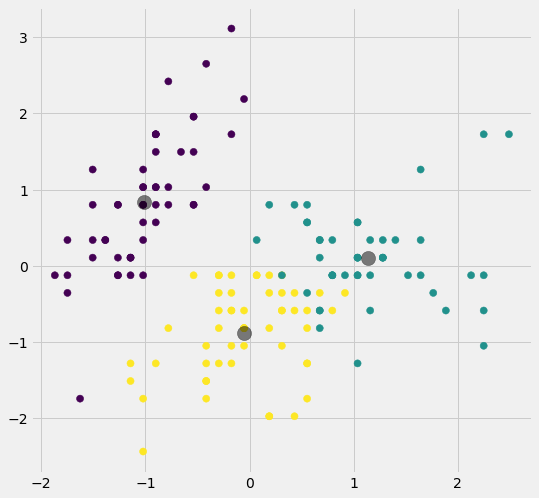

In [204]:
plt.figure(figsize = (8,8))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);